# The Moore-Penrose Pseudoinverse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (4, 4)

Populating the interactive namespace from numpy and matplotlib


In [25]:
A = np.array([[7, 2], [3, 4], [5, 3]])
print(A)

[[7 2]
 [3 4]
 [5 3]]


In [26]:
U, D, V = np.linalg.svd(A)

In [27]:
print(U)

[[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]


In [28]:
print(D)

[10.25142677  2.62835484]


In [29]:
print(V)

[[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


In [31]:
D_plus = np.zeros((A.shape[0], A.shape[1])).T
print(D_plus)

[[0. 0. 0.]
 [0. 0. 0.]]


In [32]:
D_plus[:D.shape[0], :D.shape[0]] = np.linalg.inv(np.diag(D))
print(D_plus)

[[0.0975474  0.         0.        ]
 [0.         0.38046613 0.        ]]


In [33]:
A_plus = V.T.dot(D_plus).dot(U.T)
print(A_plus)

[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


In [34]:
print(np.linalg.pinv(A))

[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


In [36]:
print(A_plus.dot(A))

[[1.00000000e+00 2.63677968e-16]
 [5.55111512e-17 1.00000000e+00]]


In [37]:
A_plus_1 = np.linalg.inv(A.T.dot(A)).dot(A.T)
print(A_plus_1)

[[ 0.16666667 -0.10606061  0.03030303]
 [-0.16666667  0.28787879  0.06060606]]


## Pseudoinverse solves overdetermined systems of linear equations

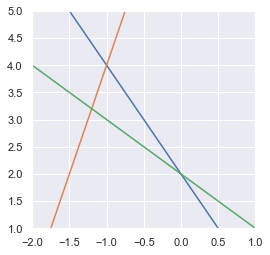

In [38]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [39]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
print(A)

[[-2 -1]
 [ 4 -1]
 [-1 -1]]


In [40]:
A_plus = np.linalg.pinv(A)
print(A_plus)

[[-0.11290323  0.17741935 -0.06451613]
 [-0.37096774 -0.27419355 -0.35483871]]


In [41]:
b = np.array([[-2], [-8], [-2]])
print(b)

[[-2]
 [-8]
 [-2]]


In [42]:
res = A_plus.dot(b)
print(res)

[[-1.06451613]
 [ 3.64516129]]


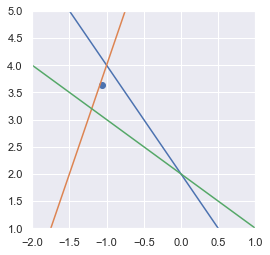

In [43]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()